<a href="https://colab.research.google.com/github/masfour7/introml/blob/master/MLProject_updated.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Sentence Sentiment Classification**

1.   Loading data
2.   Word embedding and mapping:
*   Google's word2vec
*   Facebook's FastText
*   Bag of words
3.   Trainning the model:
*   Logistic regression
*   K-nearest neighbor algorithm
*   support vector machines
4.   Measure performance:
*   Train-test split
*   loss, error rate, recall, percision

Questions after testing:
should we add regularization? feature transformation ..?







# Loading Data (UCI)

In [269]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets, linear_model, preprocessing
%matplotlib inline

In [0]:
imdb_df = pd.read_csv("/content/drive/My Drive/Colab Notebooks/imdb_labelled.txt", 
                        delimiter='\t', 
                        header=None, 
                        names=['review', 'sentiment'])

yelp_df = pd.read_csv("/content/drive/My Drive/Colab Notebooks/yelp_labelled.txt", 
                        delimiter='\t', 
                        header=None, 
                        names=['review', 'sentiment'])

amazon_df=pd.read_csv("/content/drive/My Drive/Colab Notebooks/amazon_cells_labelled.txt",delimiter='\t',
                        header=None, 
                        names=['review', 'sentiment'])



In [272]:
imdb_df.head()

,review,sentiment
0,"A very, very, very slow-moving, aimless movie ...",0
1,Not sure who was more lost - the flat characte...,0
2,Attempting artiness with black & white and cle...,0
3,Very little music or anything to speak of.,0
4,The best scene in the movie was when Gerardo i...,1


In [273]:
yelp_df.head()

,review,sentiment
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [274]:
amazon_df.head()

,review,sentiment
0,So there is no way for me to plug it in here i...,0
1,"Good case, Excellent value.",1
2,Great for the jawbone.,1
3,Tied to charger for conversations lasting more...,0
4,The mic is great.,1


In [0]:
allData = pd.concat([amazon_df,yelp_df,imdb_df])

In [276]:
allData

,review,sentiment
0,So there is no way for me to plug it in here i...,0
1,"Good case, Excellent value.",1
2,Great for the jawbone.,1
3,Tied to charger for conversations lasting more...,0
4,The mic is great.,1
...,...,...
743,I just got bored watching Jessice Lange take h...,0
744,"Unfortunately, any virtue in this film's produ...",0
745,"In a word, it is embarrassing.",0
746,Exceptionally bad!,0


In [0]:
sentences=allData['review'].tolist()
label=allData['sentiment'].tolist()

In [278]:
# examples:
for i in range(7):
    print("{} {}".format(sentences[i],label[i]))

So there is no way for me to plug it in here in the US unless I go by a converter. 0
Good case, Excellent value. 1
Great for the jawbone. 1
Tied to charger for conversations lasting more than 45 minutes.MAJOR PROBLEMS!! 0
The mic is great. 1
I have to jiggle the plug to get it to line up right to get decent volume. 0
If you have several dozen or several hundred contacts, then imagine the fun of sending each of them one by one. 0


In [279]:
allData.shape

(2748, 2)

# word2vec

Using Gensim library

In [0]:
from time import time  # To time our operations
from collections import defaultdict  # For word frequency

import spacy  # For preprocessing
import re  # For preprocessing

import logging  # Setting up the loggings to monitor gensim
logging.basicConfig(format="%(levelname)s - %(asctime)s: %(message)s", datefmt= '%H:%M:%S', level=logging.INFO)

In [281]:
# make sure the data is clean
allData.isnull().sum()

review       0
sentiment    0
dtype: int64

##bigrams (small data)

> Indented block



In [0]:
from gensim.models.phrases import Phrases, Phraser

In [0]:
sent = [row.split() for row in allData['review']]

In [284]:
phrases = Phrases(sent, min_count=30, progress_per=1000)

INFO - 04:18:33: collecting all words and their counts
INFO - 04:18:33: PROGRESS: at sentence #0, processed 0 words and 0 word types
INFO - 04:18:33: PROGRESS: at sentence #1000, processed 10246 words and 9671 word types
INFO - 04:18:33: PROGRESS: at sentence #2000, processed 21140 words and 18504 word types
INFO - 04:18:33: collected 30876 word types from a corpus of 35742 words (unigram + bigrams) and 2748 sentences
INFO - 04:18:33: using 30876 counts as vocab in Phrases<0 vocab, min_count=30, threshold=10.0, max_vocab_size=40000000>


In [285]:
bigram = Phraser(phrases)
sentences = bigram[sent]

INFO - 04:18:33: source_vocab length 30876
INFO - 04:18:33: Phraser built with 0 phrasegrams


In [286]:
sentences

In [287]:
word_freq = defaultdict(int)
for sent in sentences:
    for i in sent:
        word_freq[i] += 1
len(word_freq)

8012

##Train (small data)

In [0]:
import multiprocessing

from gensim.models import Word2Vec

In [0]:
cores = multiprocessing.cpu_count() # Count the number of cores in a computer

In [0]:
# 1-setup
w2v_model = Word2Vec(min_count=10,
                     window=10,
                     size=300,
                     sample=6e-5, 
                     alpha=0.03, 
                     min_alpha=0.0007, 
                     negative=20,
                     workers=cores-1)

In [0]:
# #2-building vocabulary
# w2v_model.build_vocab(sentences, progress_per=1000)

In [0]:
# #3-trainning the model
# w2v_model.train(sentences, total_examples=w2v_model.corpus_count, epochs=30, report_delay=1)

In [0]:
# #memory effeciency
# w2v_model.init_sims(replace=True)

In [0]:
# w2v_model.wv.most_similar(positive=["amazing"])

In [0]:
# w2v_model.wv.most_similar(positive=["bad"])

#Adding bigger data from Amazon

In [296]:
# try adding new data
names = ['ID', 'productID','userID', 'Profilename', 
         'helpfulnessnum', 'helpfulnessden', 'score', 'time', 'summary','text']
df1 = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Reviews.csv',
                 header=None,names=names,na_values='?')

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (0,4,5,6,7) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [0]:
# remove first raw
df2 = df1[1:]

In [0]:
df3 = df2[df2['score']!=3]  

In [0]:
df=df3[['text','score']]


In [300]:
print(df.shape)
df.head()

(531051, 2)


,text,score
1,I have bought several of the Vitality canned d...,5
2,Product arrived labeled as Jumbo Salted Peanut...,1
3,This is a confection that has been around a fe...,4
4,If you are looking for the secret ingredient i...,2
5,Great taffy at a great price. There was a wid...,5


In [301]:
# make sure the data is clean (no null)
print(df['score'].isnull().sum())
df['text'].isnull().sum() 

0


0

In [0]:
def mark_sentiment(rating):
  if(int(rating)<3):
    return 0
  else:
    return 1

In [303]:
df['sentiment']=df['score'].apply(mark_sentiment)
df.drop(['score'],axis=1,inplace=True)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [304]:
df['review']=df['text']
df.drop(['text'],axis=1,inplace=True)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [305]:
df.head()

,sentiment,review
1,1,I have bought several of the Vitality canned d...
2,0,Product arrived labeled as Jumbo Salted Peanut...
3,1,This is a confection that has been around a fe...
4,0,If you are looking for the secret ingredient i...
5,1,Great taffy at a great price. There was a wid...


In [306]:
df.shape

(531051, 2)

In [0]:
data = pd.concat([allData, df])

In [308]:
data.shape

(533799, 2)

In [309]:
data.head()

,review,sentiment
0,So there is no way for me to plug it in here i...,0
1,"Good case, Excellent value.",1
2,Great for the jawbone.,1
3,Tied to charger for conversations lasting more...,0
4,The mic is great.,1


In [310]:
 data = data[:100000]
 data.shape

(100000, 2)

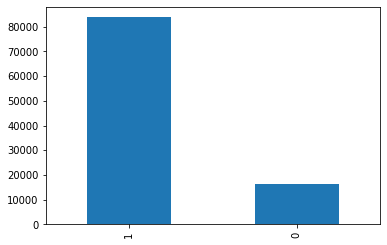

In [311]:
data['sentiment'].value_counts().plot(kind='bar')

##Preprocessing and cleanning

In [312]:
import string
import nltk
nltk.download('stopwords')
nltk.download('punkt')

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [0]:
def remove_stop(sent): 
  stop_words = set(stopwords.words('english'))
  stop_words.update(list(string.punctuation))

  word_tokens = word_tokenize(sent) 
    
  filtered_sent = [w for w in word_tokens if not w in stop_words] 
    
  return " ".join(filtered_sent)

In [314]:
data['review'] = data['review'].apply(remove_stop)
data

,review,sentiment
0,So way plug US unless I go converter,0
1,Good case Excellent value,1
2,Great jawbone,1
3,Tied charger conversations lasting 45 minutes....,0
4,The mic great,1
...,...,...
100075,This best ramen I 've 's kind family eating ye...,1
100076,This awesome flavor ... nutritional value litt...,1
100077,Absolutely great condition good price love ram...,1
100078,This Korean-style ramen one favorites As indiv...,1


##bigrams (big data)

In [0]:
sent = [row.split() for row in data['review']]

In [316]:
phrases = Phrases(sent, min_count=30, progress_per=100000)

INFO - 04:20:04: collecting all words and their counts
INFO - 04:20:04: PROGRESS: at sentence #0, processed 0 words and 0 word types
INFO - 04:20:12: collected 1702653 word types from a corpus of 4863939 words (unigram + bigrams) and 100000 sentences
INFO - 04:20:12: using 1702653 counts as vocab in Phrases<0 vocab, min_count=30, threshold=10.0, max_vocab_size=40000000>


In [317]:
bigram = Phraser(phrases)
sentences = bigram[sent]

INFO - 04:20:12: source_vocab length 1702653
INFO - 04:20:28: Phraser built with 2849 phrasegrams


##Train (big data)

In [318]:
# 2-building vocabulary
w2v_model.build_vocab(sentences, progress_per=100000)

INFO - 04:20:28: collecting all words and their counts
INFO - 04:20:28: PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
INFO - 04:20:41: collected 109294 word types from a corpus of 4537682 raw words and 100000 sentences
INFO - 04:20:41: Loading a fresh vocabulary
INFO - 04:20:41: effective_min_count=10 retains 20180 unique words (18% of original 109294, drops 89114)
INFO - 04:20:41: effective_min_count=10 leaves 4353565 word corpus (95% of original 4537682, drops 184117)
INFO - 04:20:41: deleting the raw counts dictionary of 109294 items
INFO - 04:20:41: sample=6e-05 downsamples 919 most-common words
INFO - 04:20:41: downsampling leaves estimated 2380549 word corpus (54.7% of prior 4353565)
INFO - 04:20:41: estimated required memory for 20180 words and 300 dimensions: 58522000 bytes
INFO - 04:20:41: resetting layer weights


In [319]:
# 3-trainning the model
w2v_model.train(sentences, total_examples=w2v_model.corpus_count, epochs=1, report_delay=1)

INFO - 04:20:45: training model with 3 workers on 20180 vocabulary and 300 features, using sg=0 hs=0 sample=6e-05 negative=20 window=10
INFO - 04:20:46: EPOCH 1 - PROGRESS: at 7.13% examples, 110007 words/s, in_qsize 0, out_qsize 0
INFO - 04:20:48: EPOCH 1 - PROGRESS: at 12.48% examples, 115747 words/s, in_qsize 0, out_qsize 1
INFO - 04:20:49: EPOCH 1 - PROGRESS: at 17.55% examples, 119027 words/s, in_qsize 0, out_qsize 0
INFO - 04:20:50: EPOCH 1 - PROGRESS: at 22.64% examples, 119737 words/s, in_qsize 0, out_qsize 0
INFO - 04:20:51: EPOCH 1 - PROGRESS: at 27.58% examples, 120777 words/s, in_qsize 1, out_qsize 0
INFO - 04:20:52: EPOCH 1 - PROGRESS: at 32.86% examples, 120589 words/s, in_qsize 0, out_qsize 0
INFO - 04:20:53: EPOCH 1 - PROGRESS: at 38.47% examples, 121000 words/s, in_qsize 0, out_qsize 0
INFO - 04:20:54: EPOCH 1 - PROGRESS: at 43.22% examples, 120278 words/s, in_qsize 0, out_qsize 0
INFO - 04:20:55: EPOCH 1 - PROGRESS: at 47.94% examples, 120156 words/s, in_qsize 0, out_

(2380889, 4537682)

In [320]:
w2v_model.wv.most_similar(positive=["amazing"])

INFO - 04:21:05: precomputing L2-norms of word weight vectors
/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('awesome', 0.9999714493751526),
 ('fantastic', 0.9999706149101257),
 ('craving', 0.9999679327011108),
 ('ok', 0.999967098236084),
 ('super', 0.9999666213989258),
 ('These_chips', 0.9999665021896362),
 ('exactly', 0.999966025352478),
 ('mind', 0.9999654293060303),
 ('expect', 0.9999651908874512),
 ('addictive', 0.9999650716781616)]

In [321]:
w2v_model.wv.most_similar(positive=["bad"])

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('probably', 0.999948263168335),
 ("'d", 0.999947190284729),
 ('felt', 0.9999460577964783),
 ("'m_sure", 0.9999415278434753),
 ('horrible', 0.9999403357505798),
 ('thing', 0.9999395608901978),
 ('sure', 0.9999391436576843),
 ('anything', 0.99993896484375),
 ('terrible', 0.9999382495880127),
 ('However', 0.9999377727508545)]

In [322]:
w2v_model.wv.most_similar(positive=["good"])

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('nice', 0.9997374415397644),
 ('really', 0.9997140169143677),
 ('This', 0.9996923804283142),
 ('The', 0.9996499419212341),
 ('spicy', 0.9996374845504761),
 ('great', 0.9996285438537598),
 ('tastes', 0.9996030330657959),
 ('like', 0.9995982050895691),
 ('overpowering', 0.9995871782302856),
 ('bit', 0.9995326995849609)]

In [0]:
#calculating average word2vec
def get_avg_vec(words):
  # remove out-of-vocabulary words
  words = [word for word in words if word in w2v_model.wv.vocab]
  if len(words) >= 1:
      return np.mean(w2v_model[words], axis=0)
  else:
      return []

In [324]:
data['vector'] = data['review'].apply(get_avg_vec)
data

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """


,review,sentiment,vector
0,So way plug US unless I go converter,0,"[0.05085963, 0.07579343, 0.12554887, -0.072429..."
1,Good case Excellent value,1,"[0.044323068, 0.06713143, 0.1093247, -0.064477..."
2,Great jawbone,1,"[0.041104414, 0.0616751, 0.10173492, -0.059571..."
3,Tied charger conversations lasting 45 minutes....,0,"[0.049753953, 0.07952506, 0.12642197, -0.07591..."
4,The mic great,1,"[0.039640427, 0.06369145, 0.10138138, -0.06016..."
...,...,...,...
100075,This best ramen I 've 's kind family eating ye...,1,"[0.046944622, 0.07018237, 0.11594651, -0.06695..."
100076,This awesome flavor ... nutritional value litt...,1,"[0.042086057, 0.06522633, 0.10583529, -0.06227..."
100077,Absolutely great condition good price love ram...,1,"[0.04145142, 0.06715417, 0.10613022, -0.064399..."
100078,This Korean-style ramen one favorites As indiv...,1,"[0.046171054, 0.07202161, 0.116127826, -0.0689..."


In [325]:
data['sentiment'] = data['sentiment'].astype(int)
data = data[data['vector'].map(len) == 300]

data

,review,sentiment,vector
0,So way plug US unless I go converter,0,"[0.05085963, 0.07579343, 0.12554887, -0.072429..."
1,Good case Excellent value,1,"[0.044323068, 0.06713143, 0.1093247, -0.064477..."
2,Great jawbone,1,"[0.041104414, 0.0616751, 0.10173492, -0.059571..."
3,Tied charger conversations lasting 45 minutes....,0,"[0.049753953, 0.07952506, 0.12642197, -0.07591..."
4,The mic great,1,"[0.039640427, 0.06369145, 0.10138138, -0.06016..."
...,...,...,...
100075,This best ramen I 've 's kind family eating ye...,1,"[0.046944622, 0.07018237, 0.11594651, -0.06695..."
100076,This awesome flavor ... nutritional value litt...,1,"[0.042086057, 0.06522633, 0.10583529, -0.06227..."
100077,Absolutely great condition good price love ram...,1,"[0.04145142, 0.06715417, 0.10613022, -0.064399..."
100078,This Korean-style ramen one favorites As indiv...,1,"[0.046171054, 0.07202161, 0.116127826, -0.0689..."


#KNN

In [0]:
from sklearn import datasets, linear_model
from sklearn.model_selection import cross_val_score

def find_optimal_k(X_train,y_train, myList):
   
    #creating odd list of K for KNN
    #myList = list(range(0,40))
    neighbors = list(filter(lambda x: x % 2 != 0, myList))
    # empty list that will hold cv scores
    cv_scores = []

    # perform 10-fold cross validation
    for k in neighbors:
        knn = KNeighborsClassifier(n_neighbors=k)
        scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
        cv_scores.append(scores.mean())

    # changing to misclassification error
    MSE = [1 - x for x in cv_scores]

    # determining best k
    optimal_k = neighbors[MSE.index(min(MSE))]
    print('\nThe optimal number of neighbors is %d.' % optimal_k)


    plt.figure(figsize=(10,6))
    plt.plot(list(filter(lambda x: x % 2 != 0, myList)),MSE,color='blue', linestyle='dashed', marker='o',
             markerfacecolor='red', markersize=10)
    plt.title('Error Rate vs. K Value')
    plt.xlabel('K')
    plt.ylabel('Error Rate')

    print("the misclassification error for each k value is : ", np.round(MSE,3))
    
    return optimal_k

In [327]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(data, test_size=0.3)

train

,review,sentiment,vector
14336,There 's much taste good texture n't shatter u...,1,"[0.04463731, 0.06852746, 0.11149402, -0.065551..."
32796,The title says We pleased flavor Grade B price...,1,"[0.04087058, 0.05979434, 0.099775136, -0.05685..."
15536,I feeding greyhounds treats years My hounds li...,1,"[0.045792837, 0.06888309, 0.11337594, -0.06574..."
56544,This best deal ever The delivery fast chips de...,1,"[0.03645266, 0.055996444, 0.09081919, -0.05330..."
36161,My friend recommands cookies said really tasty...,0,"[0.04886211, 0.07087249, 0.11890247, -0.067962..."
...,...,...,...
23424,I picked pure nostalgia Shake 'N Bake one `` e...,1,"[0.044011477, 0.06760382, 0.11017217, -0.06490..."
10908,The product received schedule perfect conditio...,1,"[0.045759182, 0.069208555, 0.1136148, -0.06614..."
87350,I let product I purchased Switch href= '' http...,0,"[0.04456759, 0.068285204, 0.11146419, -0.06518..."
7170,I hate bugs I adore Bug Bites chocolate square...,1,"[0.04257768, 0.064828314, 0.10613213, -0.06185..."


In [0]:
Xtr1 = np.array(train['vector'].tolist())
ytr1 = np.array(train['sentiment'])

Xts1 = np.array(test['vector'].tolist())
yts1 = np.array(test['sentiment'])


The optimal number of neighbors is 27.
the misclassification error for each k value is :  [0.23  0.203 0.184 0.175 0.171 0.167 0.166 0.164 0.164 0.163 0.163 0.163
 0.163 0.162 0.163]


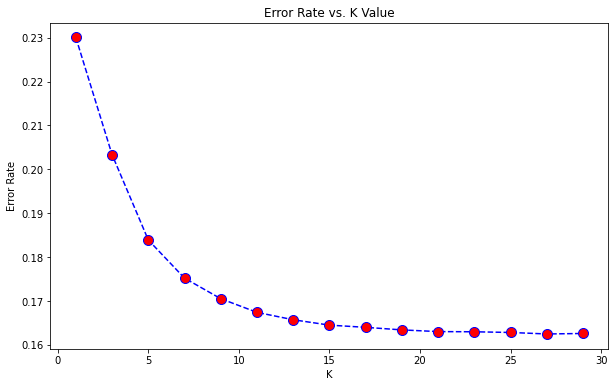

In [329]:
from sklearn.neighbors import KNeighborsClassifier
myList = list(range(0,30))

optimal_k = find_optimal_k(Xtr1 ,ytr1,myList)

In [0]:

knn = KNeighborsClassifier(n_neighbors=optimal_k)

In [331]:
knn.fit(Xtr1, ytr1)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=27, p=2,
                     weights='uniform')

In [0]:
pred = knn.predict(Xts1)

In [333]:
acc = np.mean(pred == yts1)
print('Accuaracy = {0:f}'.format(acc))

recall = np.sum((pred == 1)*(yts1 == 1))/np.sum(yts1 == 1)
precision = np.sum((pred == 1)*(yts1 == 1))/np.sum(pred == 1)
print("Recall: " + str(recall))
print("Precision: " + str(precision))

Accuaracy = 0.836800
Recall: 0.9988050665179639
Precision: 0.83748580589139


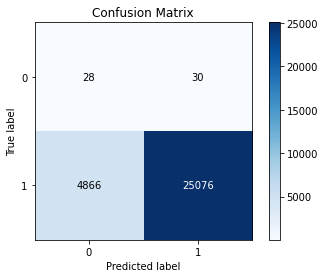

In [334]:
!pip install scikit-plot

import scikitplot.metrics as skplt
skplt.plot_confusion_matrix(pred, yts1)

#SVM

In [0]:
from sklearn import svm 

svcrbf = svm.SVC(probability=False, kernel="rbf",verbose=10) #C=2.8, gamma=.0073

In [336]:
svcrbf.fit(Xtr1,ytr1)

[LibSVM]

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=10)

In [0]:
yhat_ts = svcrbf.predict(Xts1)

In [338]:
acc = np.mean(yhat_ts == yts1)
print('Accuaracy = {0:f}'.format(acc))

recall = np.sum((yhat_ts == 1)*(yts1 == 1))/np.sum(yts1 == 1)
precision = np.sum((yhat_ts == 1)*(yts1 == 1))/np.sum(yhat_ts == 1)
print("Recall: " + str(recall))
print("Precision: " + str(precision))

Accuaracy = 0.836867
Recall: 1.0
Precision: 0.8368666666666666


#Logistic Regression

In [339]:
X = np.array(data['vector'].tolist())
y = np.array(data['sentiment'])

logreg = linear_model.LogisticRegression(penalty='none',solver='lbfgs')
logreg.fit(X, y)
yhat = logreg.predict(X)

acc = np.mean(yhat == y)
print("Accuracy: " + str(acc))

recall = np.sum((yhat == 1)*(y == 1))/np.sum(y == 1)
precision = np.sum((yhat == 1)*(y == 1))/np.sum(yhat == 1)
print("Recall: " + str(recall))
print("Precision: " + str(precision))

Accuracy: 0.83752
Recall: 0.9996417397119587
Precision: 0.8376998979244641


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


#Naive Bayes

In [340]:
# train a Gaussian Naive Bayes classifier on the training set
from sklearn.naive_bayes import GaussianNB

# instantiate the model
gnb = GaussianNB()

# fit the model
gnb.fit(Xtr1, ytr1)

GaussianNB(priors=None, var_smoothing=1e-09)

In [0]:
y_pred = gnb.predict(Xts1)

In [342]:
acc = np.mean(y_pred == yts1)
print('Accuaracy = {0:f}'.format(acc))

recall = np.sum((y_pred == 1)*(yts1 == 1))/np.sum(yts1 == 1)
precision = np.sum((y_pred == 1)*(yts1 == 1))/np.sum(y_pred == 1)
print("Recall: " + str(recall))
print("Precision: " + str(precision))

Accuaracy = 0.692867
Recall: 0.7681032422528479
Precision: 0.8504145351913918


#Try pre-trained model

Used using another .ipynb file